# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect('db/Market.db')

# TODO: Set up the cursor
cur = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
	SELECT COUNT(*) FROM Products where Price < 10;
	""")
rows = cur.fetchall()
print(rows)


[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS Frequency
    FROM Suppliers
    GROUP BY Country
    ORDER BY Frequency DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


In [6]:
# TODO: Convert your list of tuples to a dataframe
rows = [('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]
df = pd.DataFrame(rows, columns=['Country', 'Frequency'])
df.head()


,Country,Frequency
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2


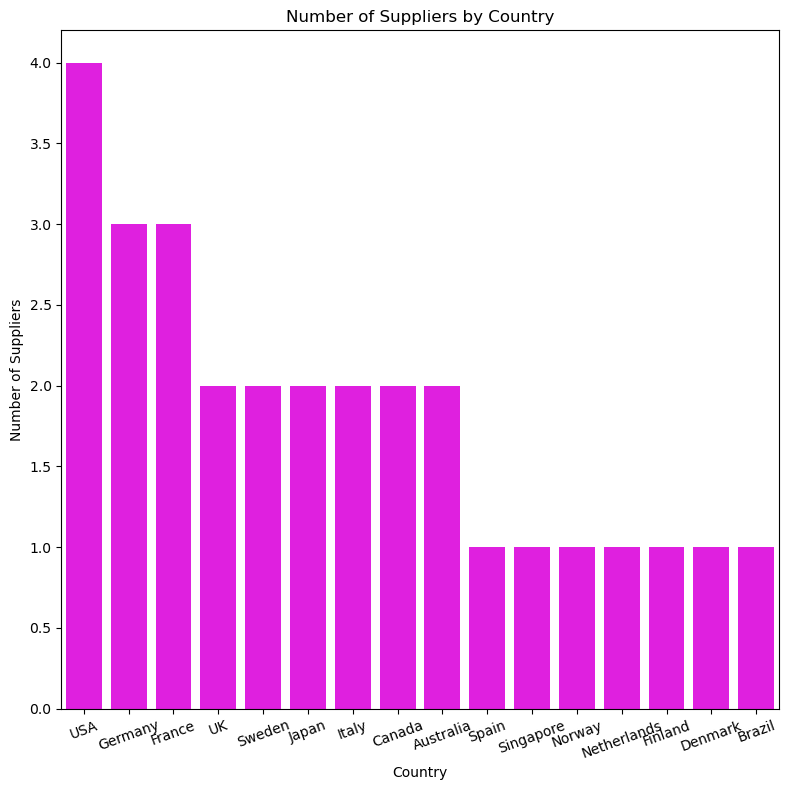

In [7]:
# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(8, 8))
sns.barplot(x='Country', y='Frequency', data=df, color='magenta')
plt.xticks(rotation=20)
plt.title('Number of Suppliers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Suppliers')
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [8]:

# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Country, COUNT(*) AS Frequency
    FROM Customers
    GROUP BY Country
    ORDER BY Frequency DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)



[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


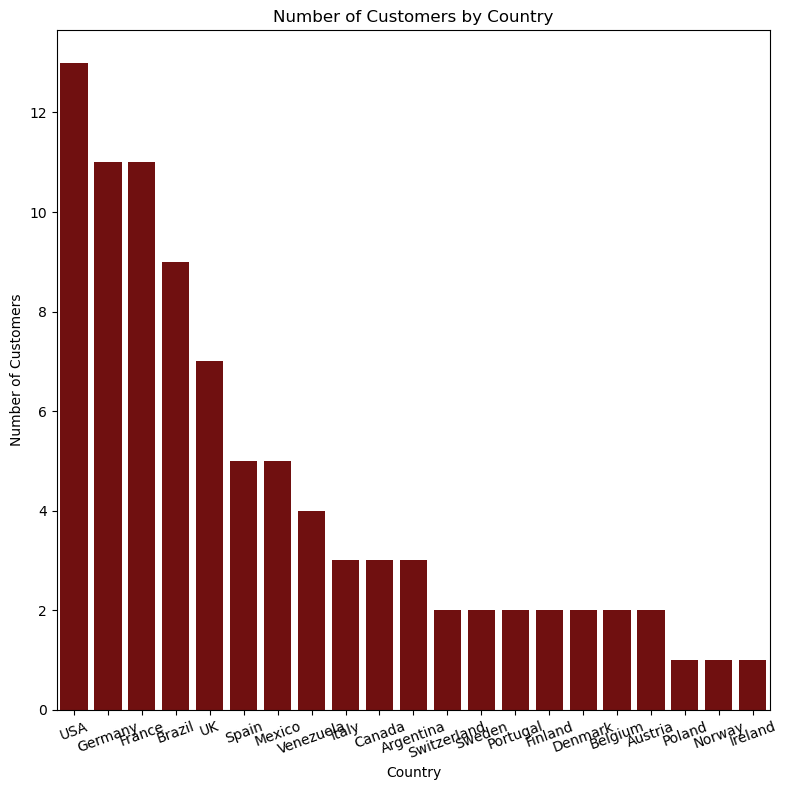

In [9]:
# TODO: Convert your list of tuples to a dataframe
rows = [('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]
df = pd.DataFrame(rows, columns=['Country', 'Frequency'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(8, 8))
sns.barplot(x='Country', y='Frequency', data=df, color='maroon')
plt.xticks(rotation=20)
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Products.ProductName,
    SUM(OrderDetails.Quantity) AS TotalQuantity
    FROM Products
    JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
    GROUP BY Products.ProductName
    ORDER BY TotalQuantity ASC
    LIMIT 20
;
""")
# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


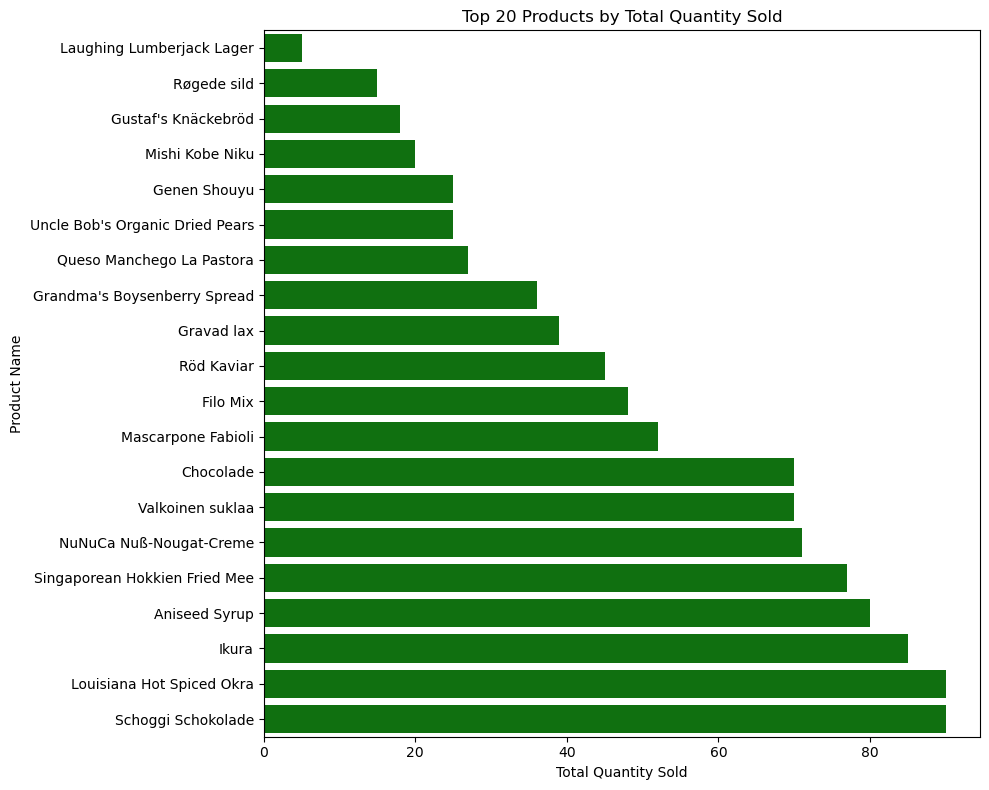

Ellipsis

In [11]:
# TODO: Convert your list of tuples to a dataframe
rows = [('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]
df = pd.DataFrame(rows, columns=['ProductName', 'TotalQuantity'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 8))
sns.barplot(x='TotalQuantity', y='ProductName', data=df, color='green')
plt.title('Top 20 Products by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()
...

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [14]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Products.ProductName,
    SUM(OrderDetails.Quantity) AS TotalRevenue
    FROM Products
    JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
    GROUP BY Products.ProductName
    ORDER BY TotalRevenue ASC
    LIMIT 20;
""")
# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


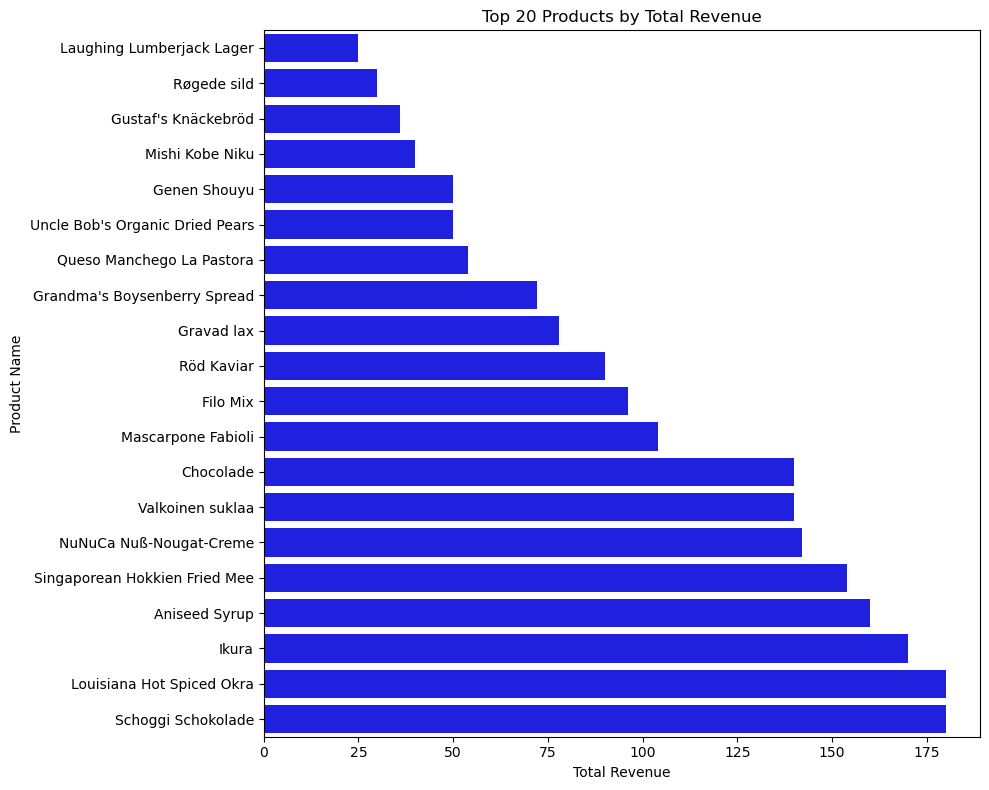

Ellipsis

In [17]:
# TODO: Convert your list of tuples to a dataframe
rows = [('Laughing Lumberjack Lager', 25.0), ('Røgede sild', 30.0), ("Gustaf's Knäckebröd", 36.0), ('Mishi Kobe Niku', 40.0), ('Genen Shouyu', 50.0), ("Uncle Bob's Organic Dried Pears", 50.0), ('Queso Manchego La Pastora', 54.0), ("Grandma's Boysenberry Spread", 72.0), ('Gravad lax', 78.0), ('Röd Kaviar', 90.0), ('Filo Mix', 96.0), ('Mascarpone Fabioli', 104.0), ('Chocolade', 140.0), ('Valkoinen suklaa', 140.0), ('NuNuCa Nuß-Nougat-Creme', 142.0), ('Singaporean Hokkien Fried Mee', 154.0), ('Aniseed Syrup', 160.0), ('Ikura', 170.0), ('Louisiana Hot Spiced Okra', 180.0), ('Schoggi Schokolade', 180.0)]
df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 8))
sns.barplot(x='TotalRevenue', y='ProductName', data=df, color='blue')
plt.title('Top 20 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()
...

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [20]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT Customers.Country,
    COUNT (Orders.OrderID) AS OrdersCount
    FROM Orders
    JOIN Customers ON Orders.CustomerID = Customers.CustomerID
    GROUP BY Customers.Country
    ORDER BY OrdersCount DESC
    LIMIT 20;
""")
...

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1)]


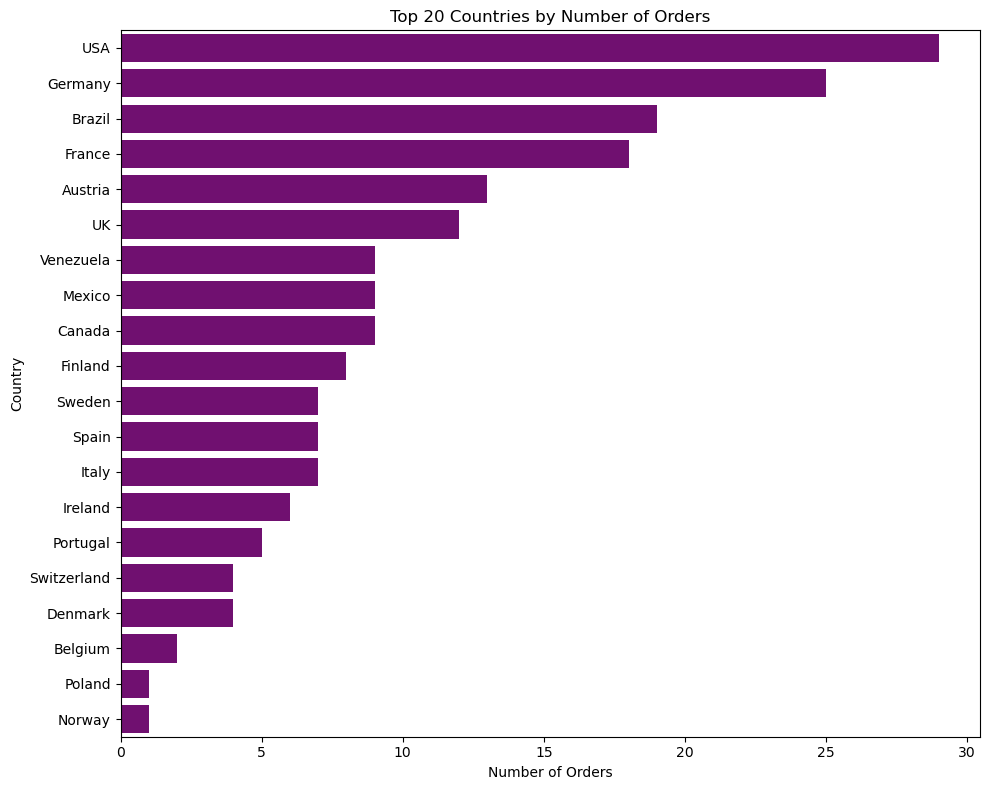

In [22]:
# TODO: Convert your list of tuples to a dataframe
rows = [('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1)]

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(rows, columns=['Country', 'OrdersCount'])
plt.figure(figsize=(10, 8))
sns.barplot(x='OrdersCount', y='Country', data=df, color='purple')
plt.title('Top 20 Countries by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [23]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT 
    Customers.Country,
    COUNT (*) AS NumberOfCustomersWithNoOrders
    FROM Customers
    LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
    WHERE Orders.OrderID IS NULL
    GROUP BY Customers.Country
    ORDER BY NumberOfCustomersWithNoOrders DESC
    LIMIT 20;  
""")
...

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


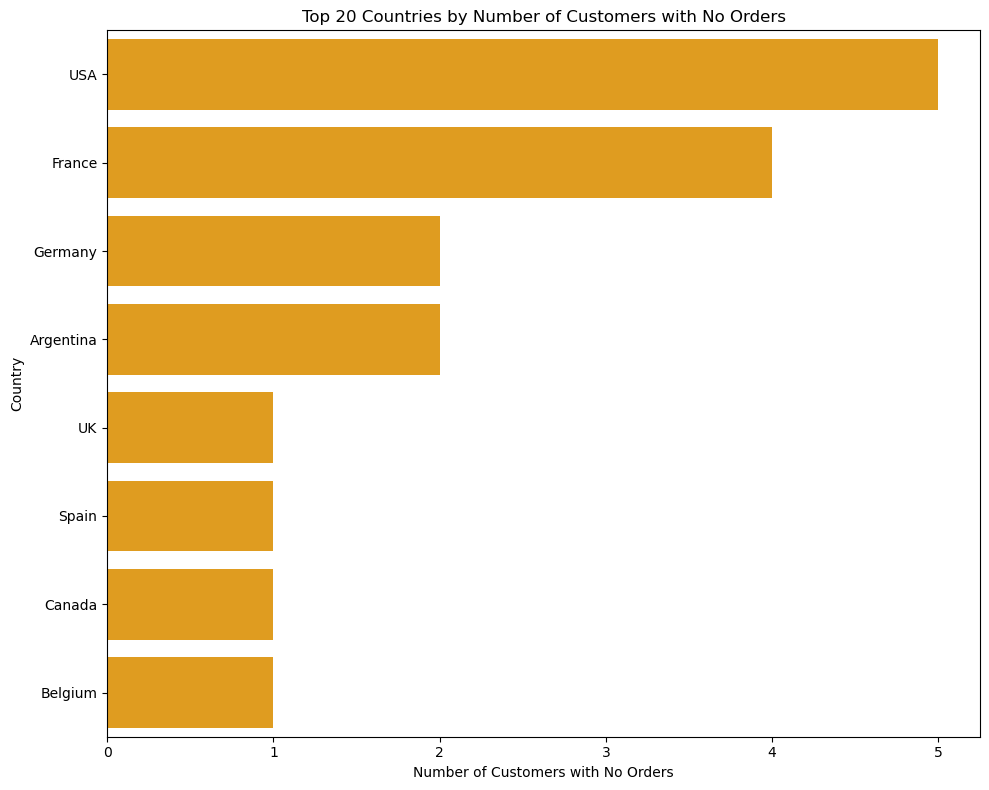

Ellipsis

In [25]:
# TODO: Convert your list of tuples to a dataframe
rows = [('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]
# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(rows, columns=['Country', 'NumberOfCustomersWithNoOrders'])
plt.figure(figsize=(10, 8))
sns.barplot(x='NumberOfCustomersWithNoOrders', y='Country', data=df, color='orange')
plt.title('Top 20 Countries by Number of Customers with No Orders')
plt.xlabel('Number of Customers with No Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
...

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [26]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
    SELECT 
    Suppliers.SupplierName,
    COUNT(DISTINCT OrderDetails.OrderID) AS NumberOfOrders
    FROM Suppliers
    JOIN Products ON Suppliers.SupplierID = Products.SupplierID
    JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
    GROUP BY Suppliers.SupplierName
    ORDER BY NumberOfOrders DESC
    LIMIT 20;
""")


# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows) 

[('Plutzer Lebensmittelgroßmärkte AG', 37), ('Pavlova, Ltd.', 37), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 30), ('Formaggi Fortini s.r.l.', 27), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 18), ('New England Seafood Cannery', 17), ("Mayumi's", 16), ('Leka Trading', 16), ('Bigfoot Breweries', 16), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Heli Süßwaren GmbH & Co. KG', 14), ('Svensk Sjöföda AB', 13)]


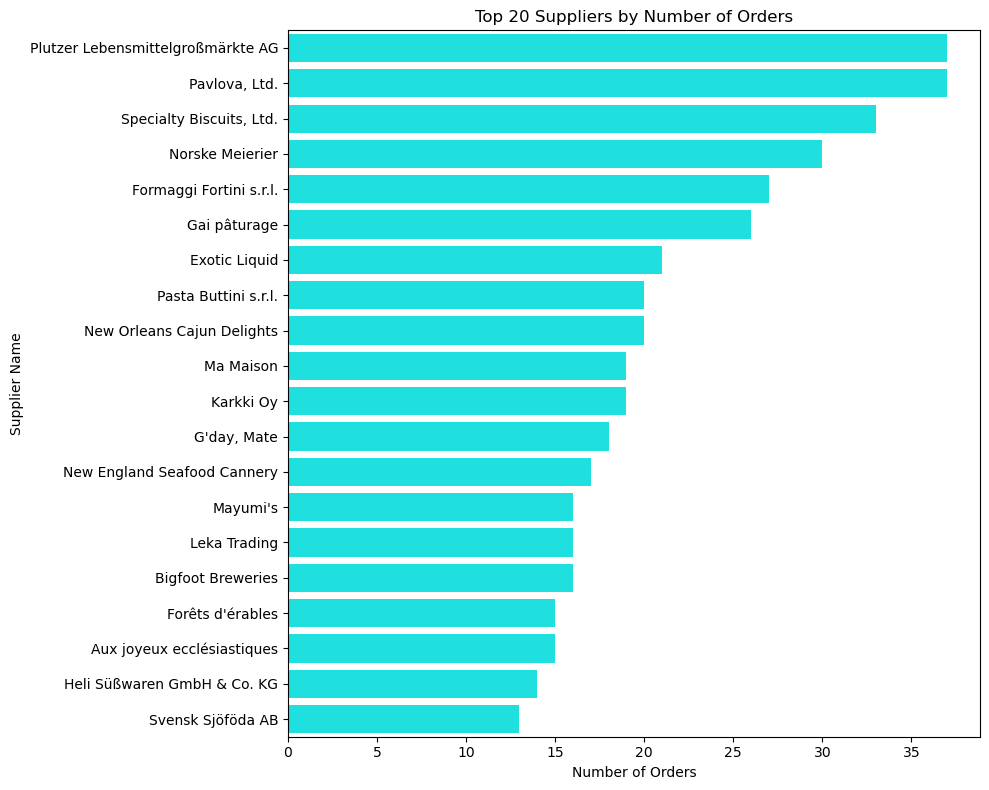

Ellipsis

In [ ]:
# TODO: Convert your list of tuples to a dataframe
rows = [('Plutzer Lebensmittelgroßmärkte AG', 37), ('Pavlova, Ltd.', 37), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 30), ('Formaggi Fortini s.r.l.', 27), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 18), ('New England Seafood Cannery', 17), ("Mayumi's", 16), ('Leka Trading', 16), ('Bigfoot Breweries', 16), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Heli Süßwaren GmbH & Co. KG', 14), ('Svensk Sjöföda AB', 13)]
# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(rows, columns=['SupplierName', 'NumberOfOrders'])
plt.figure(figsize=(10, 8))
sns.barplot(x='NumberOfOrders', y='SupplierName', data=df, color='cyan')
plt.title('Top 20 Suppliers by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.show()
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?
The countries with the most customers (shown by number of orders) are:

USA (29 orders)

Germany (25 orders)

Brazil (19 orders)

For suppliers by country:

USA has 4 suppliers

Germany has 3 suppliers

Brazil has 1 supplier

This means countries with more customers usually have more suppliers, but not always. For example, Brazil has many customers but only one supplier.

Evidence:

USA and Germany both have many customers and several suppliers.

Brazil has many customers but just one supplier.


### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product by order quantity is "Laughing Lumberjack Lager," with only 5 units sold. This product also generates the lowest total revenue among the listed products, at 25. This indicates a direct correlation: less popular products by quantity tend to generate less revenue. The evidence is clear from the tables showing both the total quantity sold and total revenue for each product, where "Laughing Lumberjack Lager" ranks last in both categories.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

The USA has the most orders, with a total of 29. It also has the highest number of customers who have not placed any orders, with 5 non-ordering customers. This suggests that countries with more ordering customers may also have more non-ordering customers, possibly due to a larger overall customer base. The evidence is found in the tables listing the "Number of Orders" and "Number of Customers with No Orders" by country

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders is "Plutzer Lebensmittelgroßmärkte AG" and "Pavlova, Ltd.," each with 37 orders. This is supported by the table listing suppliers and their corresponding number of orders, where these two suppliers are tied at the top